# Problem Set 1
Due April 11th at 5:30pm -- at the start of the class so we can
discuss the solutions in class.

### Before You Start

Make sure to at least take a basic tutorial in the IPython notebook,
otherwise you'll be totally lost.  For this problem set, you should
download flights.csv.bz2 and weather.csv.bz2 datasets from
Canvas (files-data).   Rename the notebook to
LASTNAME_FIRSTNAME-PS1.ipynb.

When done, please submit
1. the notebook itself
2. the rendered html or pdf of it.



## About the Problem Set: 

This problem set is rather similar to ones used for R, dplyr, and
flights data.  Just we use python and pandas.

In this problem set you will perform a basic exploratory analysis on
an example dataset, bringing to bear all of your new skills in data
manipulation and visualization. You will be required to submit well
commented python code, documenting all code used in this problem set,
along with a write up answering all questions below. Use figures as
appropriate to support your answers, and when required by the problem.


## Preliminaries

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [2]:
#IPython is what you are using now to run the notebook
import IPython
print( "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print( "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print( "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print( "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print( "Mapltolib version:    %6.6s (need at least 1.2.1)" %
       matplotlib.__version__)
%matplotlib inline
# necessary for in-line graphics

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print( "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       6.2.1 (need at least 1.0)
Numpy version:        1.13.1 (need at least 1.7.1)
SciPy version:         1.0.1 (need at least 0.12.0)
Pandas version:       0.22.0 (need at least 0.11.0)
Mapltolib version:     2.1.2 (need at least 1.2.1)
Scikit-Learn version: 0.19.1 (need at least 0.13.1)


In [22]:
## Let's read the data and print some summary information
## adjust the path for your file system!
flights_df= pd.read_csv('flights.csv.bz2')

In [4]:
print (flights_df.shape)
print (flights_df.columns)
print (flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [5]:
flights_df.dest.unique()
flights_df.head(25)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


## Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

## Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [6]:
print(flights_df[flights_df['dest']=='SEA'].count())

Unnamed: 0    3923
year          3923
month         3923
day           3923
dep_time      3904
dep_delay     3904
arr_time      3903
arr_delay     3885
carrier       3923
tailnum       3917
flight        3923
origin        3923
dest          3923
air_time      3885
distance      3923
hour          3904
minute        3904
dtype: int64


There were 3923 flights from NYC airports to Seattle in 2013. Some columns have a smaller count value due to missing data.

(b) How many airlines fly from NYC to Seattle?

In [7]:
print(flights_df[flights_df['dest']=='SEA'].carrier.unique())

['AS' 'DL' 'UA' 'B6' 'AA']


5 airlines fly from NYC to Seattle.

(c) How many unique air planes fly from NYC to Seattle?

In [8]:
print(len(flights_df[flights_df['dest']=='SEA'].tailnum.unique()))

936


936 airplanes fly from NYC to Seattle.

(d) What is the average arrival delay for flights from NC to Seattle?

In [9]:
print(flights_df[flights_df['dest'] == 'SEA'].arr_delay.mean())

-1.0990990991


On average, flights arrive in Seattle ~1 minute early.

(e) What proportion of flights to Seattle come from each NYC airport?

In [10]:
tot=origin_airports=(flights_df[flights_df['dest'] == 'SEA'].origin.count())
origin_airports=(flights_df[flights_df['dest'] == 'SEA'].origin.unique())
for airport in origin_airports:
    print(airport+":")
    print(flights_df[(flights_df['origin'] == airport) & (flights_df['dest'] == 'SEA')].flight.count()/tot)

EWR:
0.466734641856
JFK:
0.533265358144


No flights originate from LGA
~46.7% of flights originate from EWR
~53.3% of flights originate from JFK

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [11]:
print(flights_df[flights_df['dep_delay']>0].groupby(['year', 'month', 'day'])['dep_delay'].mean().sort_values(ascending=False).head())
print(flights_df[flights_df['arr_delay']>0].groupby(['year', 'month', 'day'])['arr_delay'].mean().sort_values(ascending=False).head())


year  month  day
2013  3      8      102.903522
      9      2      101.682609
             12     100.859903
      5      23      92.242009
      7      10      92.024857
Name: dep_delay, dtype: float64
year  month  day
2013  7      10     110.093439
      9      2      102.811364
      7      22     102.343470
      9      12     100.024540
      3      8       97.485315
Name: arr_delay, dtype: float64


Note: I have only considered flights with non-negative delay 
2013-3-8 had the longest average departure delay
2013-7-10 had the longest average arival delay

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [12]:
print(flights_df[flights_df['dep_delay']>0].groupby(['year', 'month', 'day'])['dep_delay'].count().sort_values(ascending=False).head())

year  month  day
2013  12     23     674
      3      8      653
      7      1      652
      6      25     649
      7      23     645
Name: dep_delay, dtype: int64


Assuming that 'disliking delayed flights' corresponds to flying on days with the largest total number of delayed flights, 2013-12-23 would be the worst day, with 674 delayed flights

(c) Are there any seasonal patterns in departure delays for flights from NYC?

In [13]:
print(flights_df[flights_df['dep_delay']>0].groupby(['month']).dep_delay.mean())

month
1     35.335334
2     35.299540
3     39.616380
4     44.185241
5     39.245151
6     49.790913
7     48.807822
8     37.274311
9     35.676775
10    31.560651
11    28.707246
12    37.203469
Name: dep_delay, dtype: float64


Yes, there are seasonal patterns in departure delays for flights. June and July appear to have the most delayed flights.

(d) On average, how do departure delays vary over the course of a day?

In [14]:
import math
flights_df['dep_hour']=(flights_df['dep_time']/100).apply(np.floor)
print(flights_df[flights_df['dep_delay']>0].groupby(['dep_hour']).dep_delay.mean())

dep_hour
0.0     128.642452
1.0     207.049327
2.0     239.921875
3.0     304.727273
5.0       6.592391
6.0      11.272904
7.0      17.932435
8.0      19.484653
9.0      26.300290
10.0     27.960072
11.0     31.883025
12.0     29.784933
13.0     28.628948
14.0     29.296095
15.0     27.906983
16.0     33.224913
17.0     35.912961
18.0     43.505234
19.0     44.520623
20.0     54.294921
21.0     64.210371
22.0     92.465274
23.0    125.344743
24.0     64.862069
Name: dep_delay, dtype: float64


It would appear that departure delays are higher during the early hours of the morning, and late at night. 

## Question 3
   Which flight departing NYC in 2013 flew the fastest?

In [15]:
flights_df['avg_speed'] = (flights_df['distance'] / flights_df['air_time']) 
flights_df.sort_values(by=['avg_speed'], ascending=False).head()

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,dep_hour,avg_speed
216447,216448,2013,5,25,1709.0,9.0,1923.0,-14.0,DL,N666DN,1499,LGA,ATL,65.0,762,17.0,9.0,17.0,11.723077
251999,252000,2013,7,2,1558.0,45.0,1745.0,26.0,EV,N17196,4667,EWR,MSP,93.0,1008,15.0,58.0,15.0,10.838710
205388,205389,2013,5,13,2040.0,15.0,2225.0,-1.0,EV,N14568,4292,EWR,GSP,55.0,594,20.0,40.0,20.0,10.800000
157516,157517,2013,3,23,1914.0,4.0,2045.0,2.0,EV,N12567,3805,EWR,BNA,70.0,748,19.0,14.0,19.0,10.685714
10223,10224,2013,1,12,1559.0,-1.0,1849.0,-28.0,DL,N956DL,1902,LGA,PBI,105.0,1035,15.0,59.0,15.0,9.857143


Flight DL-1499 from LGA to ATL on 2013-5-25 was the fastest.

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [16]:
for route, data in flights_df.groupby(['carrier', 'flight', 'dest']):
    if len(data)==365:
        print(route)

('AA', 59, 'SFO')
('AA', 119, 'LAX')
('AA', 181, 'LAX')
('AA', 1357, 'SJU')
('AA', 1611, 'MIA')
('B6', 219, 'CLT')
('B6', 359, 'BUR')
('B6', 371, 'FLL')
('B6', 431, 'SRQ')
('B6', 703, 'SJU')
('B6', 1783, 'MCO')
('DL', 2159, 'MCO')
('DL', 2391, 'TPA')
('EV', 5712, 'IAD')
('UA', 15, 'HNL')
('VX', 251, 'LAS')
('VX', 407, 'LAX')
('VX', 413, 'LAX')


the routes above fly daily

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


['EWR' 'LGA' 'JFK']


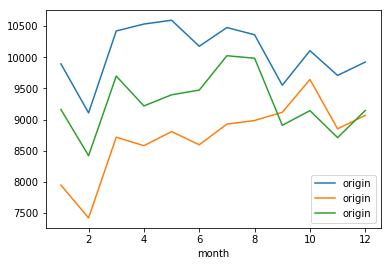

In [17]:
#Question: Is there seasonality in total number of flights at each aiport - does this pattern differ between airports?

origin_airports=(flights_df.origin.unique())
print(origin_airports)
for airport in origin_airports:
    flights_df[flights_df['origin'] == airport].groupby(['month']).origin.count().plot(legend=True)


#for airport in origin_airports:
    

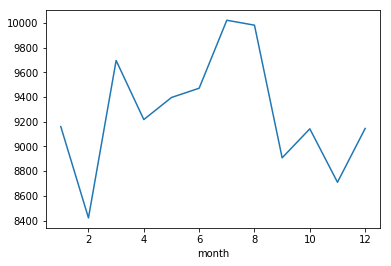

In [18]:
flights_df[flights_df['origin'] == 'JFK'].groupby(['month']).origin.count().plot()

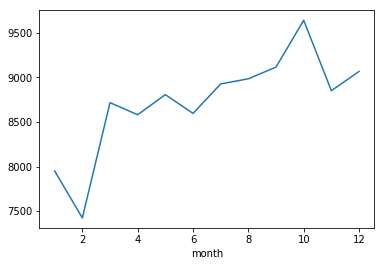

In [19]:
flights_df[flights_df['origin'] == 'LGA'].groupby(['month']).origin.count().plot()

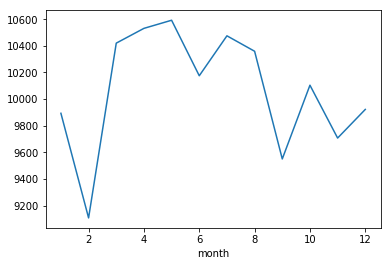

In [20]:
flights_df[flights_df['origin'] == 'EWR'].groupby(['month']).origin.count().plot()

There is a high degree of seasonality in number of flights. Although JFK and LGA carry higher volume of passengers, EWR sees the largest spike towards the end of the year - possibly because of an increase in domestic flights.

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

   Unnamed: 0 origin  year  month  day  hour   temp   dewp  humid  wind_dir  \
0           1    EWR  2013    1.0  1.0   0.0  37.04  21.92  53.97     230.0   
1           2    EWR  2013    1.0  1.0   1.0  37.04  21.92  53.97     230.0   
2           3    EWR  2013    1.0  1.0   2.0  37.94  21.92  52.09     230.0   
3           4    EWR  2013    1.0  1.0   3.0  37.94  23.00  54.51     230.0   
4           5    EWR  2013    1.0  1.0   4.0  37.94  24.08  57.04     240.0   
5           6    EWR  2013    1.0  1.0   6.0  39.02  26.06  59.37     270.0   
6           7    EWR  2013    1.0  1.0   7.0  39.02  26.96  61.63     250.0   
7           8    EWR  2013    1.0  1.0   8.0  39.02  28.04  64.43     240.0   
8           9    EWR  2013    1.0  1.0   9.0  39.92  28.04  62.21     250.0   
9          10    EWR  2013    1.0  1.0  10.0  39.02  28.04  64.43     260.0   

   wind_speed  wind_gust  precip  pressure  visib  
0    10.35702  11.918651     0.0    1013.9   10.0  
1    13.80936  15.891535  

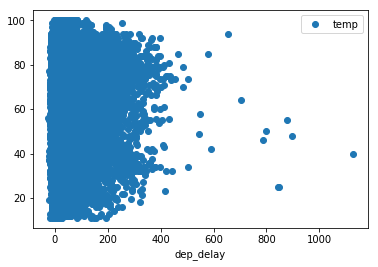

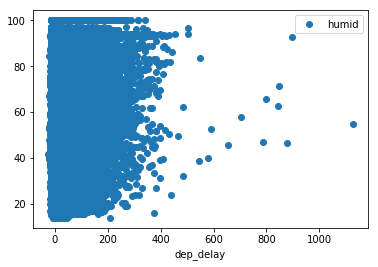

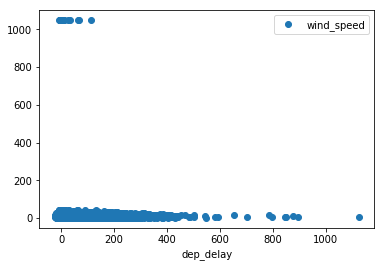

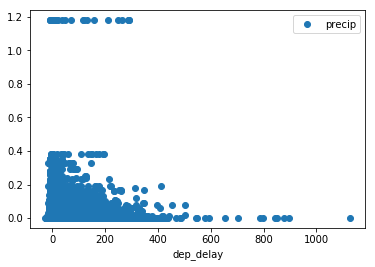

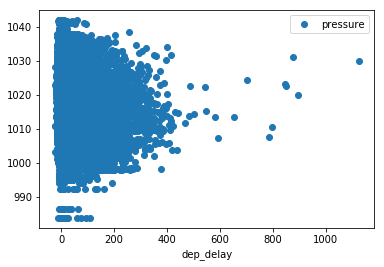

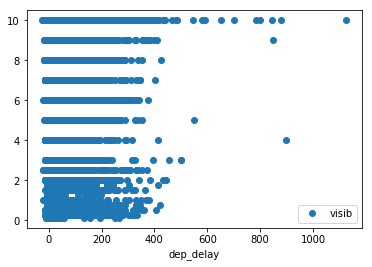

In [30]:
weather_df = pd.read_csv('weather.csv.bz2')
print(weather_df.head(10))
for col in ['year', 'month', 'day']:
    weather_df = weather_df[weather_df[col].notnull()]
joined_df = pd.merge(flights_df, weather_df,  how='left', left_on=['origin','year', 'month', 'day', 'hour'], right_on = ['origin','year', 'month', 'day', 'hour'])
#print(joined_df.head(25))
joined_df.plot(x='dep_delay', y="temp", style="o")
joined_df.plot(x='dep_delay', y="humid", style="o")
joined_df.plot(x='dep_delay', y="wind_speed", style="o")
joined_df.plot(x='dep_delay', y="precip", style="o")
joined_df.plot(x='dep_delay', y="pressure", style="o")
joined_df.plot(x='dep_delay', y="visib", style="o")


It is difficult to interpret correlation through only a graphical analysis - partly because of the density of points due to the size of the dataset. However, an increase in atmospheric pressure and humidity seem to have a visible effect on delay times.